# Sales Performance Analysis 

## Target 4

In [1]:
#First import required libraries and uploaded the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Load the CSV file into a DataFrame
final_data = pd.read_csv('new_dataset_without_outliers.csv')
final_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
2,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
3,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86
4,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28


## Monthly Sales

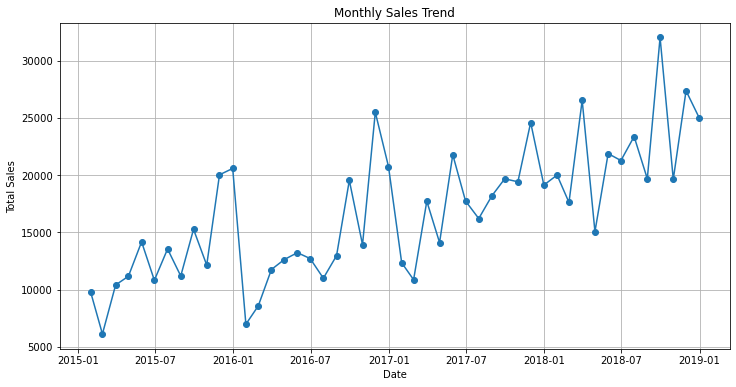

In [17]:
# Grouping sales by month and summing them up
monthly_sales = final_data.resample('M', on='Order_Date')['Sales'].sum()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()




Overall, the plot provides a quick overview of the general direction and variations in monthly sales.
Sales show an increase around the middle of each month.


## Customer Segment sales

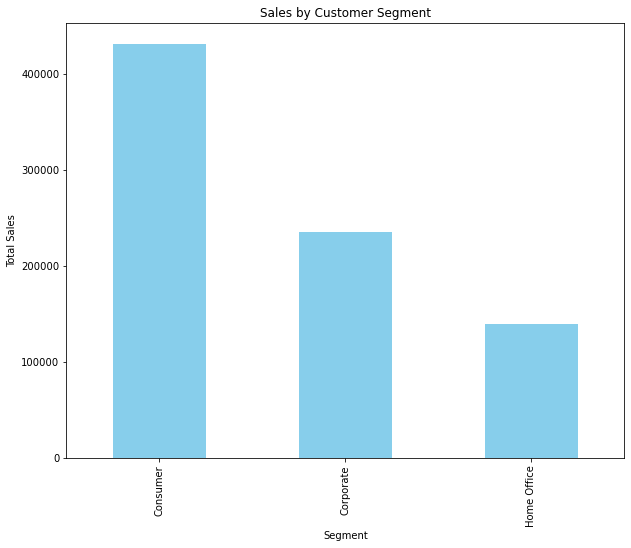

In [19]:
Customer_Segment_sales = final_data.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(10, 8))

# Plotting grouped sales
Customer_Segment_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()




The segment is divided into three customers, Corporate, Home Office and it is Identified customer groups with higher sales.

## Sub Category sales

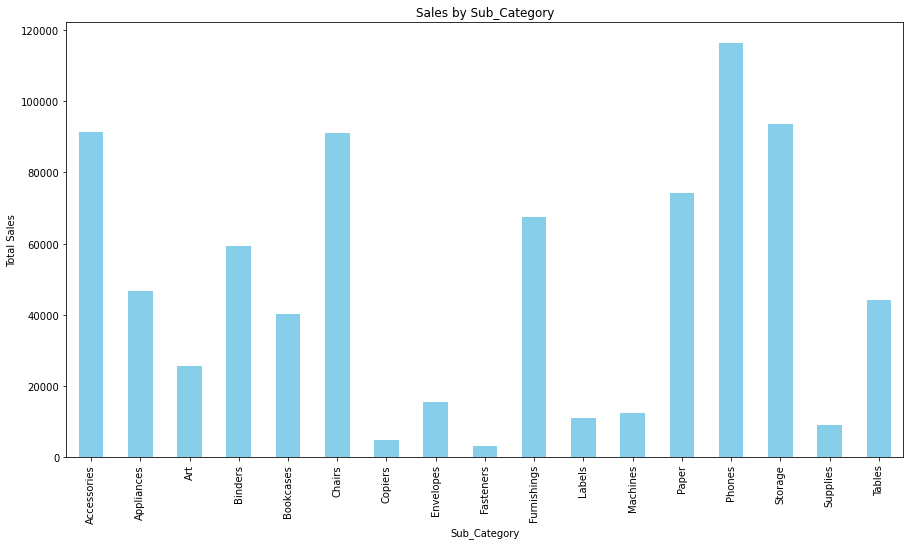

In [21]:
Sub_Category_sales = final_data.groupby('Sub_Category')['Sales'].sum()
plt.figure(figsize=(15, 8))

# Plotting grouped sales
Sub_Category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Sub_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Sales')
plt.show()





Grouped sales data by product types to identify high-performing and low-performing products.
High-performing products are phones and low-performing product is fasteners. 


## Trend in Total Sales ( Daily and weekly,Monthly)

<AxesSubplot:title={'center':'Daily Sales'}, xlabel='Order_Date', ylabel='Sales'>

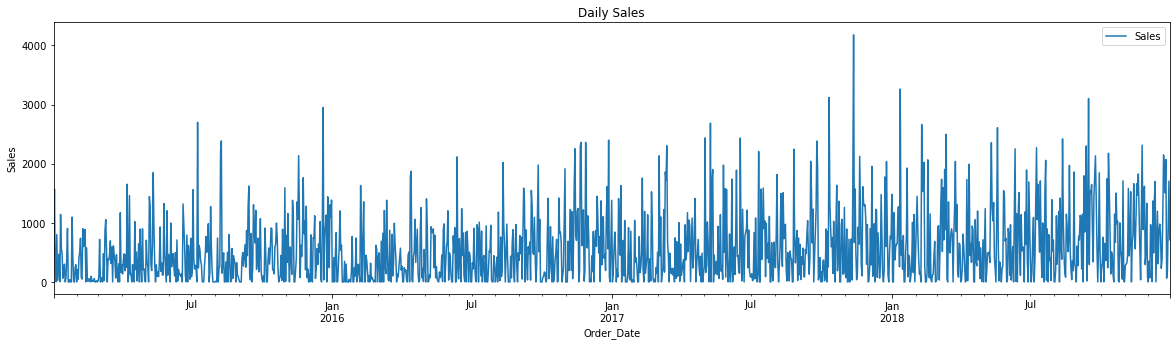

In [24]:
#Trend in Total Sales ( Daily and weekly)
# There are some duplicate values in the Order_Date feature so resampling is done
total = final_data[['Order_Date', 'Sales']].set_index('Order_Date')
total.resample(rule='D').sum().plot(title='Daily Sales', figsize=(20, 5), ylabel='Sales')




<AxesSubplot:title={'center':'Weekly Sales'}, xlabel='Order_Date', ylabel='Sales'>

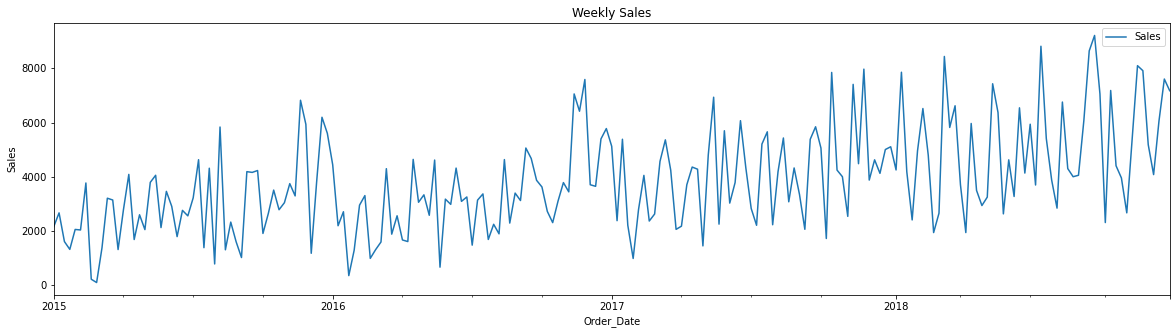

In [25]:
total.resample(rule='W').sum().plot(title='Weekly Sales', figsize=(20, 5), ylabel='Sales')

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Order_Date', ylabel='Sales'>

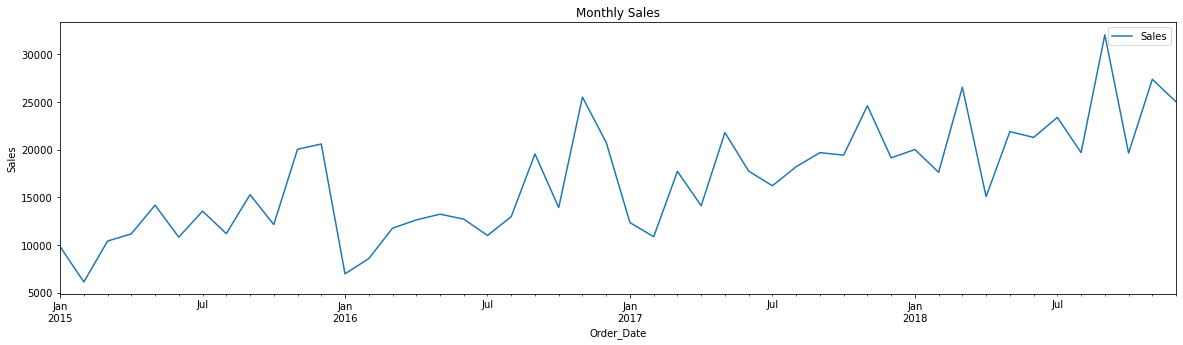

In [26]:
total.resample(rule='M').sum().plot(title='Monthly Sales', figsize=(20, 5), ylabel='Sales')

Daily Sales Trends:
•	The daily sales trend has been analyzed, but no clear patterns or seasonality were observed. Peaks were noticed around the New Year period. So we Daily Sales Analysis by Year.

Weekly Sales Trend:
•	The weekly sales trend suggests a slight upward trend with no distinct seasonality.

Monthly Sales Trend:
•	Monthly sales data indicates peaks in October to December, possibly due to seasonal factors.


## Future Sales Prediction

C:\Users\diyav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


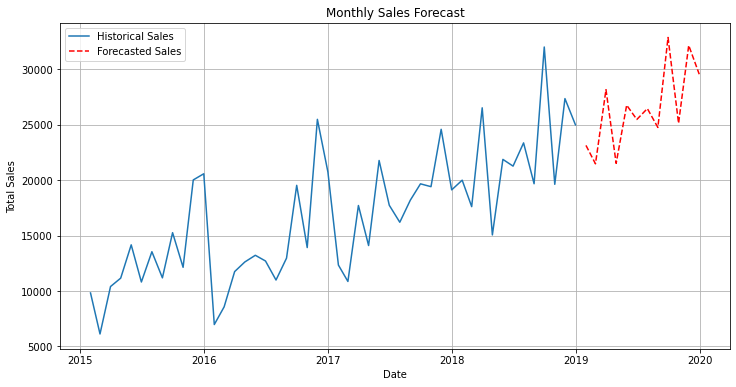

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Assuming your data is stored in a DataFrame named 'final_data'
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'])
final_data = final_data.set_index('Order_Date')

# Resampling data to monthly frequency
monthly_sales = final_data['Sales'].resample('M').sum()

# Fitting a SARIMA model
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)
model = SARIMAX(monthly_sales, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecasting future sales
forecast_steps = 12  # Adjust the number of steps as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + timedelta(days=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

# Plotting historical sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values, color='red', linestyle='dashed', label='Forecasted Sales')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

•The graph visualizes historical sales and the forecasted sales for the upcoming months.


•The rising trend in the forecast suggests an expected increase in sales in the future


## Average sales

In [18]:
# Calculate average sales
average_sales = final_data['Sales'].mean()
print(f"Average Sales: ${average_sales:.2f}")

Average Sales: $93.18


## Total sales

In [20]:
# Assuming your data is stored in a DataFrame named 'final_data'
total_sales = final_data['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")


Total Sales: $805853.68


## Total Sales Per Year

In [22]:
# Assuming your data is stored in a DataFrame named 'final_data'
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'])

# Extracting the year from the 'Order_Date' column
final_data['Year'] = final_data['Order_Date'].dt.year

# Grouping sales by year and summing them up
total_sales_per_year = final_data.groupby('Year')['Sales'].sum()

# Displaying total sales for each year
print("Total Sales Per Year:")
print(total_sales_per_year )

Total Sales Per Year:
Year
2015    155227.40
2016    169491.74
2017    211737.83
2018    269396.71
Name: Sales, dtype: float64


In [23]:
# Assuming your data is stored in a DataFrame named 'final_data'
final_data['Order_Date'] = pd.to_datetime(final_data['Order_Date'])

# Extracting the year from the 'Order_Date' column
final_data['Year'] = final_data['Order_Date'].dt.year

# Grouping sales by year and calculating the average
average_sales_per_year = final_data.groupby('Year')['Sales'].mean()

# Displaying average sales for each year
print("Average Sales Per Year:")
print(average_sales_per_year)

Average Sales Per Year:
Year
2015    91.202938
2016    94.214419
2017    94.357322
2018    92.799418
Name: Sales, dtype: float64


#Average sales

Average Sales: $93.18


#Total sales

Total Sales: $805853.68


#Total Sales Per Year

Total Sales Per Year:

Year

2015    155227.40

2016    169491.74

2017    211737.83

2018    269396.71

Total sales show consistent growth, with a significant increase from 2016 to 2017 and continued growth in 2018.